In [1]:
import sys
import os
print(sys.executable)
SRC_SUBDIR = '../..'
SRC_SUBDIR = os.path.abspath(SRC_SUBDIR)
if SRC_SUBDIR not in sys.path:
    print(f'Adding source directory to the sys.path: {SRC_SUBDIR!r}')
    sys.path.insert(1, SRC_SUBDIR)

/opt/homebrew/Caskroom/miniforge/base/envs/nlops/bin/python
Adding source directory to the sys.path: '/Volumes/Data/Projects/NLOperators'


In [2]:
import matplotlib.pyplot as plt
from hsi2rgb import HSIToRGB

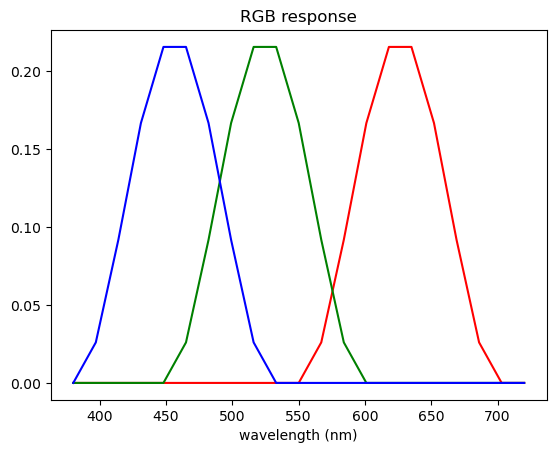

In [3]:
hsi2rgb = HSIToRGB()
wavelengths = hsi2rgb.wavelengths
rgbfilters = hsi2rgb.rgb_filters
for color, filter in rgbfilters.items():
    plt.plot(wavelengths, filter,color=color)
plt.xlabel("wavelength (nm)")
plt.title("RGB response")
plt.show()

In [4]:
from collections import namedtuple
import numpy as np
import skimage as ski
from rgb2hsi import rgb2hsi

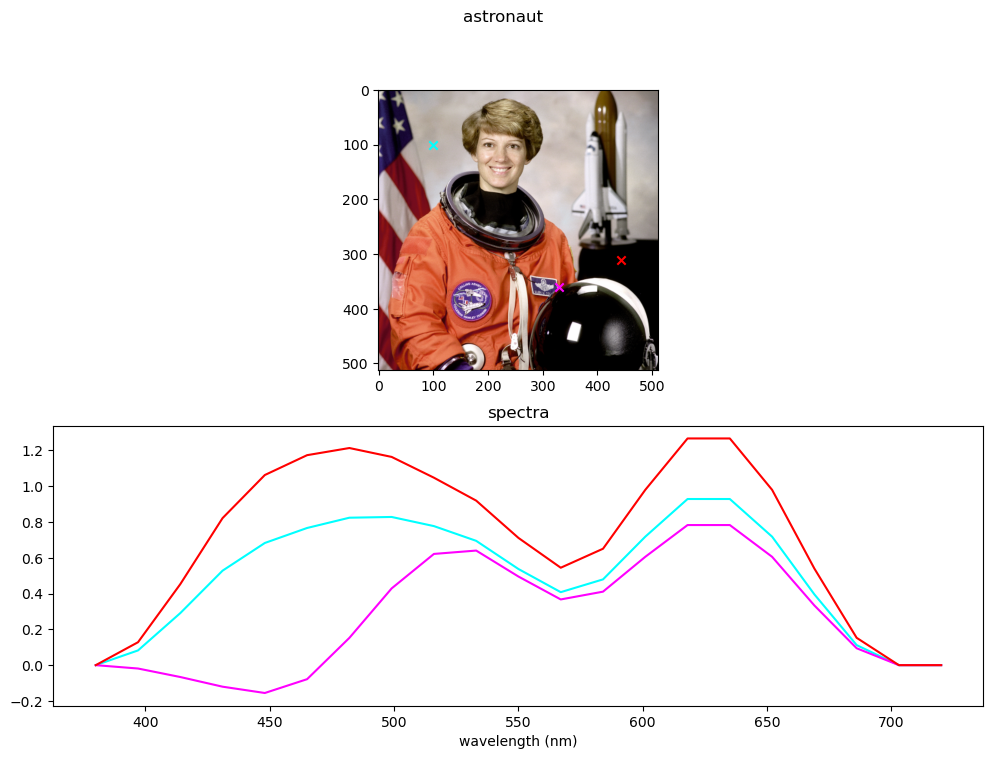

In [5]:
Point2d = namedtuple('Point', ['x', 'y','color', 'marker'])
pt_of_interest = Point2d(100, 100, 'cyan', 'x')
spectra={}
images = ('astronaut',)
use_reflectivity_bound = False
for name in images:
    caller = getattr(ski.data, name)
    image = caller()
    image=image
    hsi_image, wavelengths = rgb2hsi(image, reflectivity_bound = use_reflectivity_bound)
    loc_min = np.unravel_index(np.argmin(hsi_image), hsi_image.shape)
    loc_max = np.unravel_index(np.argmax(hsi_image), hsi_image.shape)
    pt_min = Point2d(loc_min[0], loc_min[1], 'magenta', 'x')
    pt_max = Point2d(loc_max[0], loc_max[1], 'red', 'x')
    points = [pt_of_interest, pt_min, pt_max]
    spectra = [(point, hsi_image[point.x, point.y, :]) for point in points]
    fig, [ax0,ax1] = plt.subplots(2, figsize=(12, 8))
    fig.suptitle(name)
    if image.ndim == 2:
        ax0.imshow(image, cmap=plt.cm.gray)
    else:
        ax0.imshow(image)
    for (pt, spectrum ) in spectra:
        ax0.scatter(pt.x, pt.y, marker=pt.marker, color=pt.color)
        ax1.plot(wavelengths, spectrum, color=pt.color)
        ax1.set_xlabel("wavelength (nm)")
        ax1.set_title("spectra")
    plt.show()